In [1]:
import pandas as pd
df_train=pd.read_csv('train.csv')
train_columns=df_train.columns
train_columns=train_columns[0:6]
df_train_copy=df_train
df_test= pd.read_csv('test.csv', 
                  names =train_columns)
Frame=pd.DataFrame(df_test, columns = train_columns)
# df_test=pd.read_csv('test.csv',header=None)

In [2]:
print(df_train.shape)
print(df_test.shape)

(1628, 7)
(100, 6)


In [3]:
df_test

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating
0,4,1,2,2,2,2
1,2,1,3,4,3,2
2,4,4,2,5,1,2
3,4,3,3,2,2,2
4,4,2,2,4,3,2
5,4,3,5,2,3,3
6,1,3,3,5,3,3
7,1,2,5,5,3,2
8,1,1,2,4,3,3
9,2,4,2,5,2,1


# 1. Steps of Data Exploration and Preparation

The quality of our inputs decide the quality of your output.So, once we have got our business hypothesis ready, it makes sense to spend lot of time and efforts here.Data exploration, cleaning and preparation can take up to 70% of our total project time.

The steps involved to understand, clean and prepare our data for building our predictive model are:

    
   * Variable Identification
   * Univariate Analysis
   * Bi-variate Analysis
   * Missing values treatment
   * Outlier treatment
   * Variable transformation
   * Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.


Let’s now study each stage in  detail:-

## Variable Identification

**First**:Identify Predictor (Input) and Target (output) variables.

In [4]:
target=df_train['popularity']
df_train=df_train.drop('popularity',axis=1)

In [5]:
print(df_train.shape)
print(df_test.shape)

(1628, 6)
(100, 6)


In [6]:

df_train['training_set']=1
df_test['training_set']=0
df_full=pd.concat([df_train,df_test])

**Second**:Identify the data type and category of the variables.

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 99
Data columns (total 7 columns):
buying_price         1728 non-null int64
maintainence_cost    1728 non-null int64
number_of_doors      1728 non-null int64
number_of_seats      1728 non-null int64
luggage_boot_size    1728 non-null int64
safety_rating        1728 non-null int64
training_set         1728 non-null int64
dtypes: int64(7)
memory usage: 108.0 KB


In [8]:
df_full

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,training_set
0,3,2,4,2,2,2,1
1,3,2,2,5,2,1,1
2,1,4,2,5,1,3,1
3,4,4,2,2,1,2,1
4,3,3,3,4,3,3,1
5,2,1,2,2,1,1,1
6,1,3,5,2,2,2,1
7,3,1,2,4,3,2,1
8,1,1,3,5,2,1,1
9,2,1,4,2,2,2,1


In [9]:
(df_full.T.apply(lambda x: x.nunique(), axis=1)).sort_values(ascending=False)

number_of_doors      4
maintainence_cost    4
buying_price         4
safety_rating        3
luggage_boot_size    3
number_of_seats      3
training_set         2
dtype: int64

## Univariate Analysis

In [10]:
target.describe()

count    1628.000000
mean        1.348280
std         0.654766
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: popularity, dtype: float64

In [11]:
import numpy as np
from scipy.stats import iqr
q75, q25 = np.percentile(target, [75 ,25])
print(q75)
print(q25)
iqrs = iqr(target)
print("\nRange: "+str(max(target)-min(target)))
print("\nIQR: "+str(iqrs))
print("\nVariance: "+str(np.var(target)))
print("\nStandard Deviation: "+str(np.sqrt(np.var(target))))

2.0
1.0

Range: 3

IQR: 1.0

Variance: 0.42845527289629387

Standard Deviation: 0.654564949334


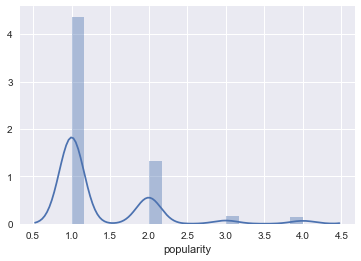

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.distplot(target)

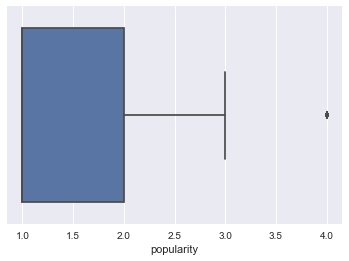

In [13]:
sns.boxplot(target)

# Bi-variate Analysis

In [14]:
# Table of survival vs. sex
Zoning = pd.crosstab(index=df_train_copy["popularity"], 
                           columns=df_train_copy["maintainence_cost"],margins=True)

Zoning

maintainence_cost,1,2,3,4,All
popularity,,,,,
1,260,266,307,352,1185
2,89,106,96,68,359
3,29,15,0,0,44
4,14,17,9,0,40
All,392,404,412,420,1628


In [15]:
ZoningPercent=Zoning.div(Zoning.ix["All"],axis=1)
ZoningPercent=ZoningPercent.T
ZoningPercent

popularity,1,2,3,4,All
maintainence_cost,,,,,
1,0.663265,0.227041,0.073980,0.035714,1.0
2,0.658416,0.262376,0.037129,0.042079,1.0
3,0.745146,0.233010,0.000000,0.021845,1.0
4,0.838095,0.161905,0.000000,0.000000,1.0
All,0.727887,0.220516,0.027027,0.024570,1.0


**2)Stacked Column Chart:** This method is more of a visual form of Two-way table.Since the number of inputs are quite large ,we worked on a different data for this Illustration.

## Chi-Square Test: 

In [16]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(Zoning)
print("Chi Value: "+str(chi2))
print("P value: "+str(p))
print(dof)
expected = pd.DataFrame(expected)
expected

Chi Value: 95.6779283069
P value: 2.22242541408e-13
16


,0,1,2,3,4
0,285.331695,294.066339,299.889435,305.712531,1185.0
1,86.442260,89.088452,90.852580,92.616708,359.0
2,10.594595,10.918919,11.135135,11.351351,44.0
3,9.631450,9.926290,10.122850,10.319410,40.0
4,392.000000,404.000000,412.000000,420.000000,1628.0


In [17]:
import scipy.stats as stats
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 10)   

print("Critical value")
print(crit)

Critical value
18.3070380533


# 2. Missing Value Treatment

In [18]:
(df_full.shape[0]-df_full.apply(lambda x: x.count(), axis=0)).sort_values(ascending=False)

training_set         0
safety_rating        0
luggage_boot_size    0
number_of_seats      0
number_of_doors      0
maintainence_cost    0
buying_price         0
dtype: int64

In [19]:
((df_full.shape[0]-df_full.apply(lambda x: x.count(), axis=0))!=0).sum()

0

There are in total of 0 columns which have atleast one value missing

In [20]:
quantitative = [f for f in df_full.columns if df_full.dtypes[f] != 'object']
print(len(quantitative))

7


quantitative is the  columns which are either float64 or int64.Now we will count the number of zeros in all the columns.

In [21]:
(df_full.shape[0]-df_full.astype(bool).sum(axis=0)).sort_values(ascending=False)

training_set         100
safety_rating          0
luggage_boot_size      0
number_of_seats        0
number_of_doors        0
maintainence_cost      0
buying_price           0
dtype: int64

In [22]:
import numpy as np   
mean = df_full[quantitative].apply(lambda x:np.mean(x, axis=0))
sd =df_full[quantitative].apply(lambda x:np.std(x, axis=0))
MeanSD = pd.concat([mean, sd], axis=1, keys=['Mean', 'Standard Deviation'])
MeanSD

,Mean,Standard Deviation
buying_price,2.500000,1.118034
maintainence_cost,2.500000,1.118034
number_of_doors,3.500000,1.118034
number_of_seats,3.666667,1.247219
luggage_boot_size,2.000000,0.816497
safety_rating,2.000000,0.816497
training_set,0.942130,0.233498


In [23]:
print(df_full.shape)

(1728, 7)


In [24]:
qualitative = [f for f in df_full.columns if f not in quantitative]

In [25]:
df_full

,buying_price,maintainence_cost,number_of_doors,number_of_seats,luggage_boot_size,safety_rating,training_set
0,3,2,4,2,2,2,1
1,3,2,2,5,2,1,1
2,1,4,2,5,1,3,1
3,4,4,2,2,1,2,1
4,3,3,3,4,3,3,1
5,2,1,2,2,1,1,1
6,1,3,5,2,2,2,1
7,3,1,2,4,3,2,1
8,1,1,3,5,2,1,1
9,2,1,4,2,2,2,1


In [26]:
(df_full.shape[0]-df_full.apply(lambda x: x.count(), axis=0)).sort_values(ascending=False)

training_set         0
safety_rating        0
luggage_boot_size    0
number_of_seats      0
number_of_doors      0
maintainence_cost    0
buying_price         0
dtype: int64

In [27]:
df_train=df_full[df_full['training_set']==1]
df_train=df_train.drop('training_set',axis=1)
#df_train = pd.get_dummies(df_train)
print(df_train.shape)


df_test=df_full[df_full['training_set']!=1]
df_test=df_test.drop('training_set',axis=1)
#df_test = pd.get_dummies(df_test)
#print(df_test.shape)

(1628, 6)


In [28]:
print(df_train.shape)
print(target.shape)
print(df_test.shape)

(1628, 6)
(1628,)
(100, 6)


In [29]:
for i in df_full.columns:
    print(i)

buying_price
maintainence_cost
number_of_doors
number_of_seats
luggage_boot_size
safety_rating
training_set


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=320,n_jobs=-1)
rf.fit(df_train,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=320, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
cv_scores =cross_val_score(rf,df_train,target,cv=5)
# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
predictions=cross_val_predict(rf,df_train,target,cv=5)
print(predictions.shape)
accuracy=metrics.r2_score(target,predictions)
print(accuracy)
preds=rf.predict(df_test)

[ 0.90161029  0.93255641  0.94447551  0.93743042  0.95770214]
Average 5-Fold CV Score: 0.9347549553481557
(1628,)
0.936355750591


## Ensemeble

In [32]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
Y=target.values
X=df_train.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)
# Test options and evaluation metric
num_folds = 10
seed = 7

In [33]:
# Spot-Check Algorithms
scoring = 'f1'
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.827921 (0.027957)
 LDA : 0.843306 (0.026747)
 KNN : 0.944703 (0.018768)
 CART : 0.970822 (0.015670)
 NB : 0.778015 (0.027083)


In [34]:
# ensembles
ensembles = []
ensembles.append(( ' AB ' , AdaBoostClassifier()))
ensembles.append(( ' GBM ' , GradientBoostingClassifier()))
ensembles.append(( ' RF ' , RandomForestClassifier()))
ensembles.append(( ' ET ' , ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 AB : 0.857915 (0.025251)
 GBM : 0.974698 (0.016369)
 RF : 0.961621 (0.016417)
 ET : 0.951644 (0.020259)


In [35]:
model = GaussianNB()
model.fit(X_train,Y_train)
prediction = model.predict(X_validation)
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))

0.760736196319
[[214  15   0   4]
 [ 19  25   1  30]
 [  0   4   2   5]
 [  0   0   0   7]]
             precision    recall  f1-score   support

          1       0.92      0.92      0.92       233
          2       0.57      0.33      0.42        75
          3       0.67      0.18      0.29        11
          4       0.15      1.00      0.26         7

avg / total       0.81      0.76      0.77       326



In [36]:
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)
prediction = model2.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.963190184049


In [37]:
model3 = ExtraTreesClassifier()
model3.fit(X_train,Y_train)
prediction = model2.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.963190184049


In [38]:
model4 = DecisionTreeClassifier()
model4.fit(X_train,Y_train)
prediction = model4.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.975460122699


In [39]:
model5=GradientBoostingClassifier()
model5.fit(X_train,Y_train)
prediction = model5.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.990797546012


In [40]:
model6=AdaBoostClassifier()
model6.fit(X_train,Y_train)
prediction = model6.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.80981595092


In [41]:
model7=KNeighborsClassifier()
model7.fit(X_train,Y_train)
prediction = model7.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.947852760736


In [42]:
model8=LogisticRegression()
model8.fit(X_train,Y_train)
prediction = model8.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.815950920245


In [43]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model9 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

0.778015267176


In [44]:
model.fit(X_train,Y_train)
prediction = model.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.760736196319


In [45]:
prediction=model.predict(df_test)

In [46]:
my_submission=pd.DataFrame(prediction)
my_submission.to_csv('submission_Bagging.csv',header=None,index=False)

In [47]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model11 = BaggingClassifier()
estimators.append(('baggingclassifier', model11))
model12 = DecisionTreeClassifier()
estimators.append(('cart', model12))
model13 = ExtraTreesClassifier()
estimators.append(('ETC', model13))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, Y_train, cv=kfold)
print(results.mean())

0.97621843805


In [48]:
ensemble.fit(X_train,Y_train)
prediction = ensemble.predict(X_validation)
print(accuracy_score(Y_validation, prediction))

0.996932515337


In [49]:
prediction=model.predict(df_test)

In [50]:
my_submission=pd.DataFrame(prediction)
my_submission.to_csv('submission_Ensemble1.csv',header=None,index=False)